In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import copy, math

In [2]:
diabetes = datasets.load_diabetes()

In [75]:
X_train = diabetes.data
y_train = diabetes.target
y_train = y_train / 10

In [76]:
X_train.shape

(442, 10)

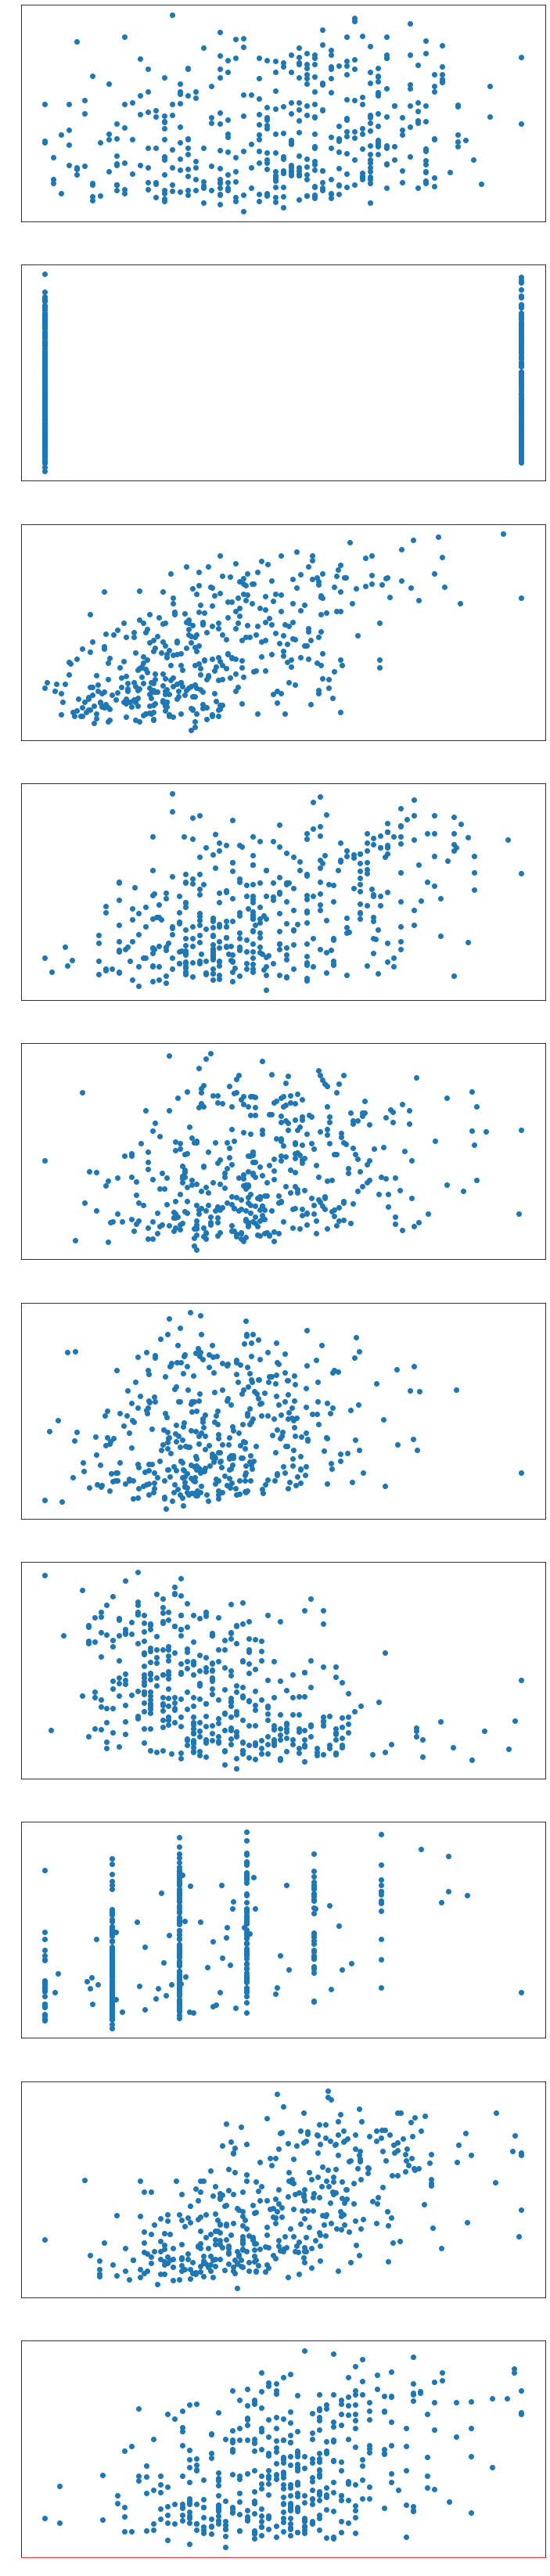

In [77]:
fig, ax = plt.subplots(10, 1, figsize=(12, 60))
for i in range(len(ax)):
    ax[i].scatter([j[i] for j in X_train], y_train)
    ax[i].tick_params(axis='x', colors='white')
    ax[i].tick_params(axis='y', colors='white')


ax[len(ax) - 1].spines['bottom'].set_color('red')

plt.show()

In [79]:
def compute_cost(x, y, w, b):
    m , n = x.shape
    cost = 0
    
    for i in range(m):
        f_wb = np.dot(x[i], w) + b
        cost += (f_wb - y[i]) ** 2
    
    return cost / (2*m)

In [80]:
def compute_gradient(x, y, w, b):
    m, n= x.shape
    dj_dw = np.zeros(n)
    dj_db = 0
    
    for i in range(m):
        err = (np.dot(x[i], w) + b) - y[i]
        for j in range(n):
            dj_dw[j] += err * x[i, j]
        dj_db += err
    return dj_dw / m, dj_db / m

In [81]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iter, compute_cost, compute_gradient):
    m, n = x.shape
    w = copy.deepcopy(w_in)
    b = b_in
    j_hist = []
    
    for i in range(num_iter):
        dj_dw, dj_db = compute_gradient(x, y, w, b)
        
        w = w - alpha*dj_dw
        b = b - alpha*dj_db
        
        if i < 10000:
            j_hist.append(compute_cost(x, y, w, b))
        
        if i % math.ceil(num_iter / 10) == 0:
            print(f"Iteration {i}\t Cost: {j_hist[i]}")
    
    return w, b, j_hist

In [82]:
w_in = np.zeros(X_train.shape[1])
b_in = 0
alpha = 0.1
num_iter = 10000

w, b, j_hist = gradient_descent(X_train, y_train, w_in, b_in, alpha, num_iter, compute_cost, compute_gradient)
print(w, b)

Iteration 0	 Cost: 123.36547762132189
Iteration 1000	 Cost: 19.68140275218058
Iteration 2000	 Cost: 17.040868675818558
Iteration 3000	 Cost: 15.973378298250324
Iteration 4000	 Cost: 15.398618012652802
Iteration 5000	 Cost: 15.050460540647745
Iteration 6000	 Cost: 14.830507710371682
Iteration 7000	 Cost: 14.68893271624539
Iteration 8000	 Cost: 14.596676976841474
Iteration 9000	 Cost: 14.5359057783078
[  0.6520989  -19.76681499  48.75404473  30.26255969  -4.17090294
 -10.63491453 -20.72349651  12.78481885  40.74832655  11.71769767] 15.213348416289628


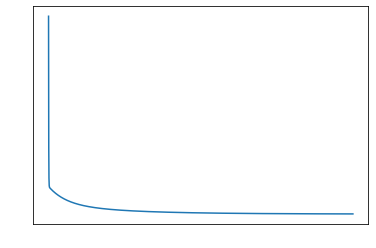

In [83]:
plt.plot(j_hist)
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.show()

In [115]:
def compute_train_model(x, w, b, attr):
    m = x.shape[0]
    f_wb = np.zeros(m)
    
    for i in range(m):
        f_wb[i] = x[i]*w[attr] + b
    return f_wb

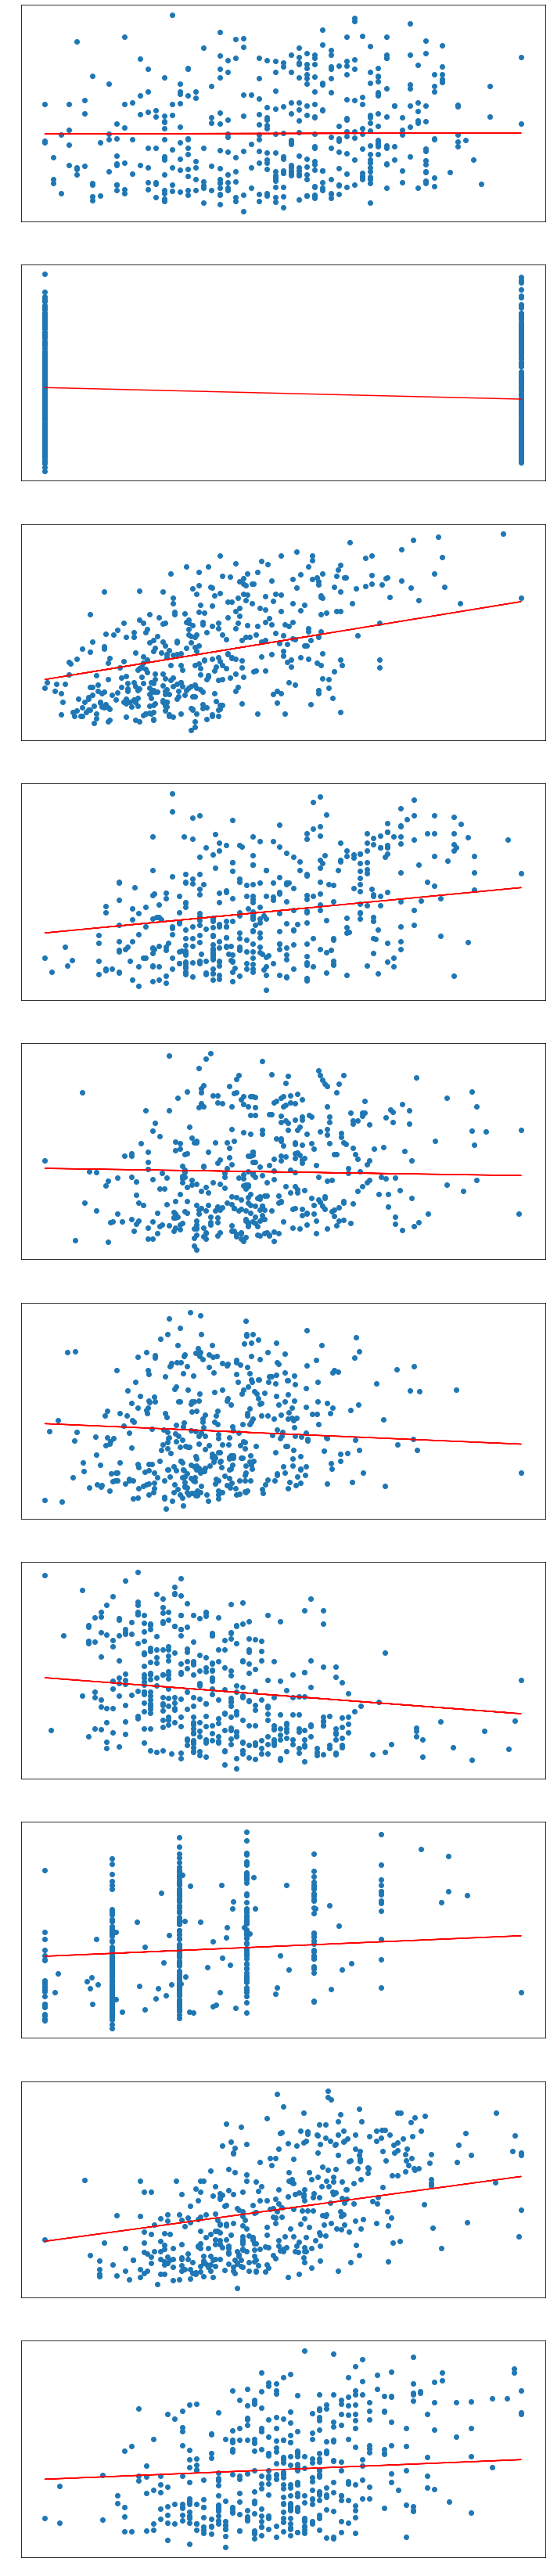

In [117]:
m, n = X_train.shape

fig, ax = plt.subplots(n, 1, figsize=(12, 60))
for i in range(len(ax)):
    f_wb = compute_train_model(X_train[:, i], w, b, i)
    ax[i].scatter(X_train[:, i], y_train)
    ax[i].plot(X_train[:, i], f_wb, c="r")
    ax[i].tick_params(axis='x', colors='white')
    ax[i].tick_params(axis='y', colors='white')
plt.show()


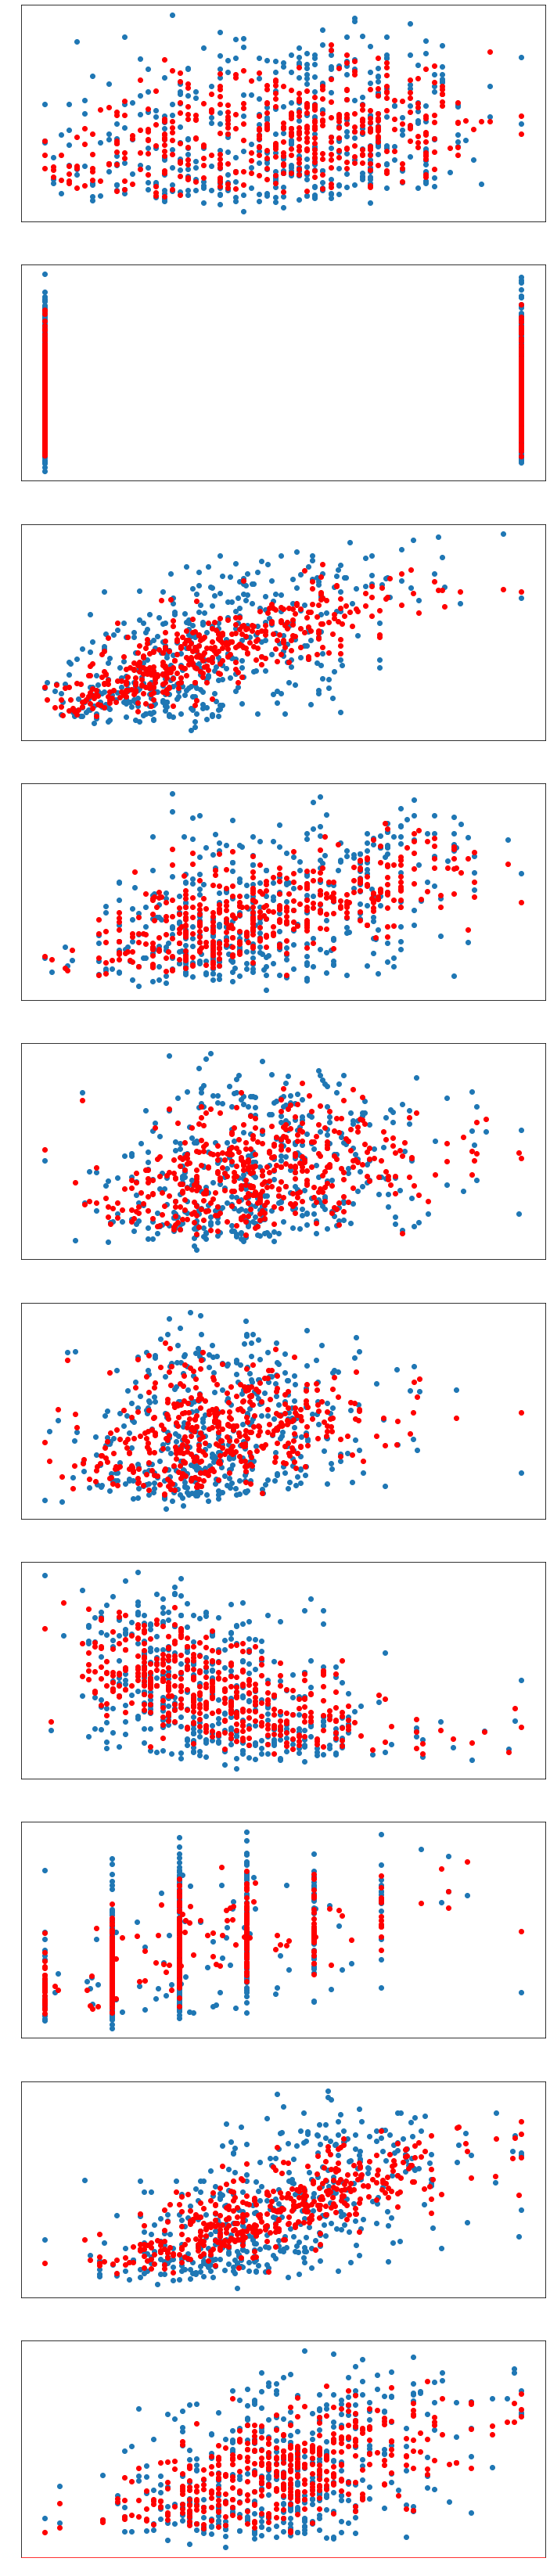

In [85]:
m, n = X_train.shape
yp = np.zeros(m)

for i in range(m):
    yp[i] = np.dot(X_train[i], w) + b

fig, ax = plt.subplots(10, 1, figsize=(12, 60))
for i in range(len(ax)):
    ax[i].scatter(X_train[:, i], y_train)
    ax[i].scatter(X_train[:, i], yp, c="r")
    ax[i].tick_params(axis='x', colors='white')
    ax[i].tick_params(axis='y', colors='white')


ax[len(ax) - 1].spines['bottom'].set_color('red')

plt.show()